<a href="https://colab.research.google.com/github/Lucress/Prediction_of_Cardiac_Disease/blob/main/Prediction_of_Cardiac_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJECTIVE: To create a classification model that can predict whether or not a person has the presence of heart disease based on that person's physical characteristics (age, sex, cholesterol, etc.).**


This database contains 14 physical attributes based on a patient's physical test. Blood samples are taken and the patient also performs a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. This is an integer (0 for no heart disease present, 1 for presence). In general, confirming 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid procedures costly and invasive.

Content

Attribute Information:

age - patient's age
sex - gender of the patient
cp (chest pain) - type of chest pain (4 values)
trestbps - resting blood pressure
chol - serum cholesterol level in mg/dl
fbs (fasting blood sugar) - fasting blood glucose --> 120 mg/dl
restecg - resting electrocardiographic results (values ​​0, 1, 2)
thalach - maximum heart rate reached
exang - exertional angina (chest pain during exertion)
oldpeak - exercise-induced ST depression relative to rest
slope - the slope of the ST segment of the exercise peak
ca - number of major vessels (0-3) stained by flourosopia
thal: 3 = normal; 6 = fixed fault; 7 = reversible fault
target: 0 for no heart disease, 1 for presence of heart disease
Original source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, RocCurveDisplay

# **Exploratory data analysis**

In [2]:
df= pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df['target'].unique()

array([1, 0])

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Visualisation of the data set**

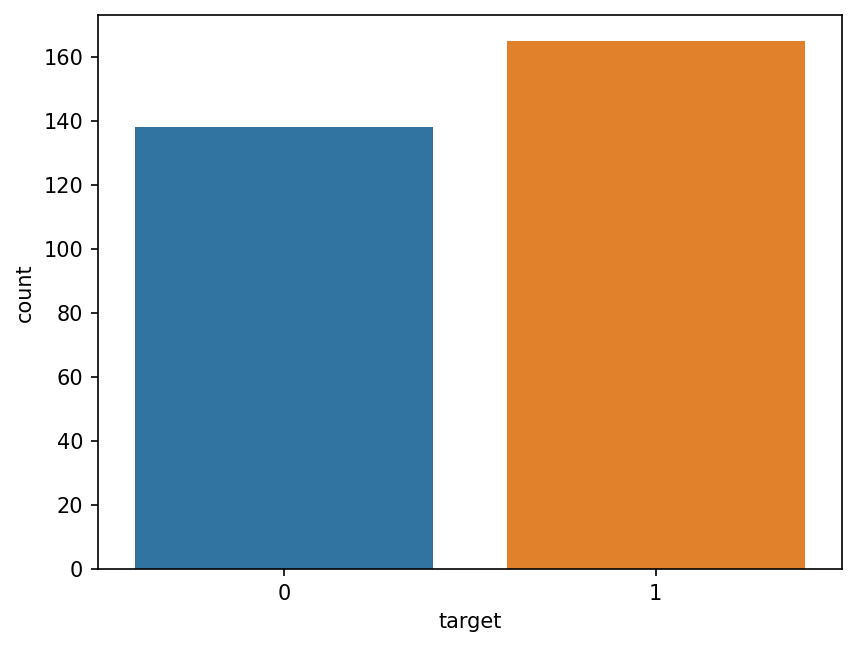

In [8]:
plt.figure(dpi=150)
sns.countplot(x='target', data=df);

<Figure size 960x720 with 0 Axes>

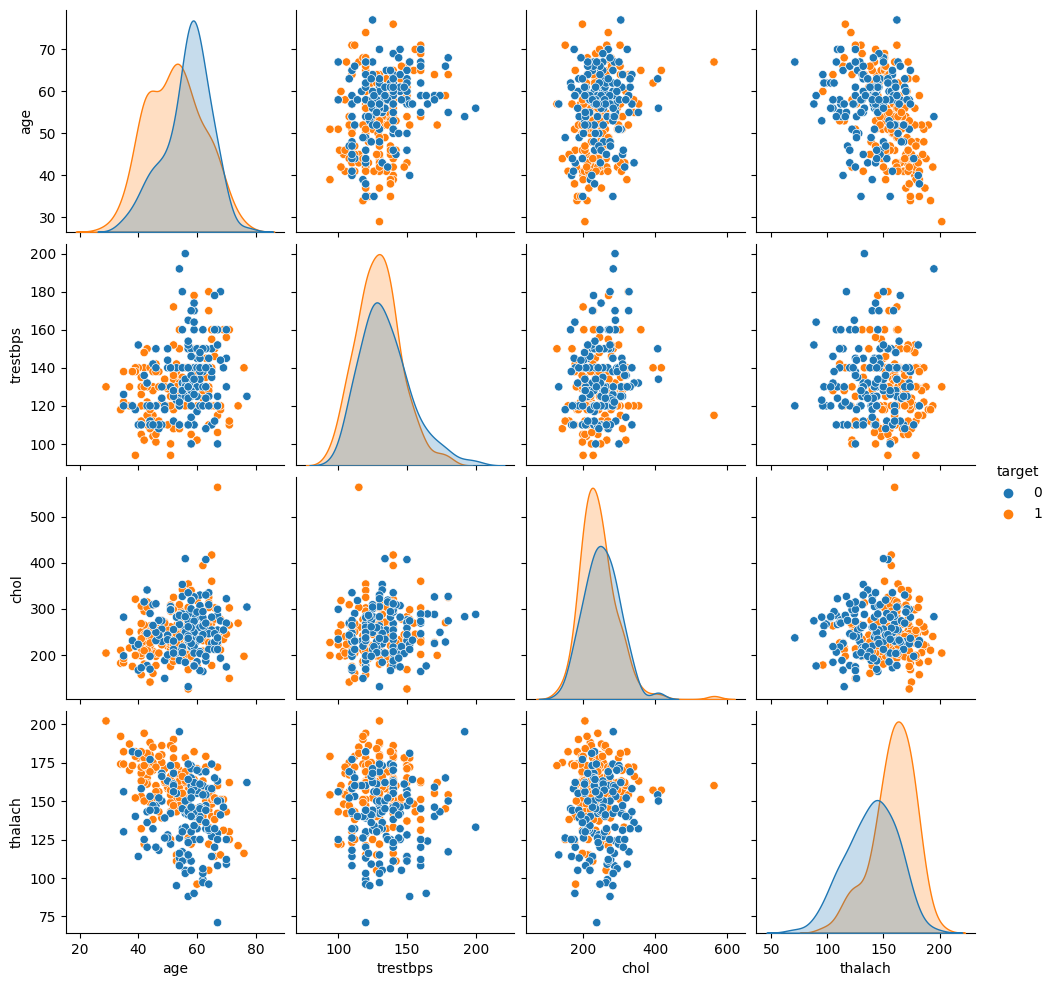

In [12]:
plt.figure(dpi=150)
sns.pairplot( data=df, x_vars=['age','trestbps','chol','thalach'], y_vars=['age','trestbps','chol','thalach'], hue='target' );

From the pairplot, we can conclude that:
- having the cardiac disease doesn't depends on the age
- having a high cp,thalach or chol, you are more likely to be sick


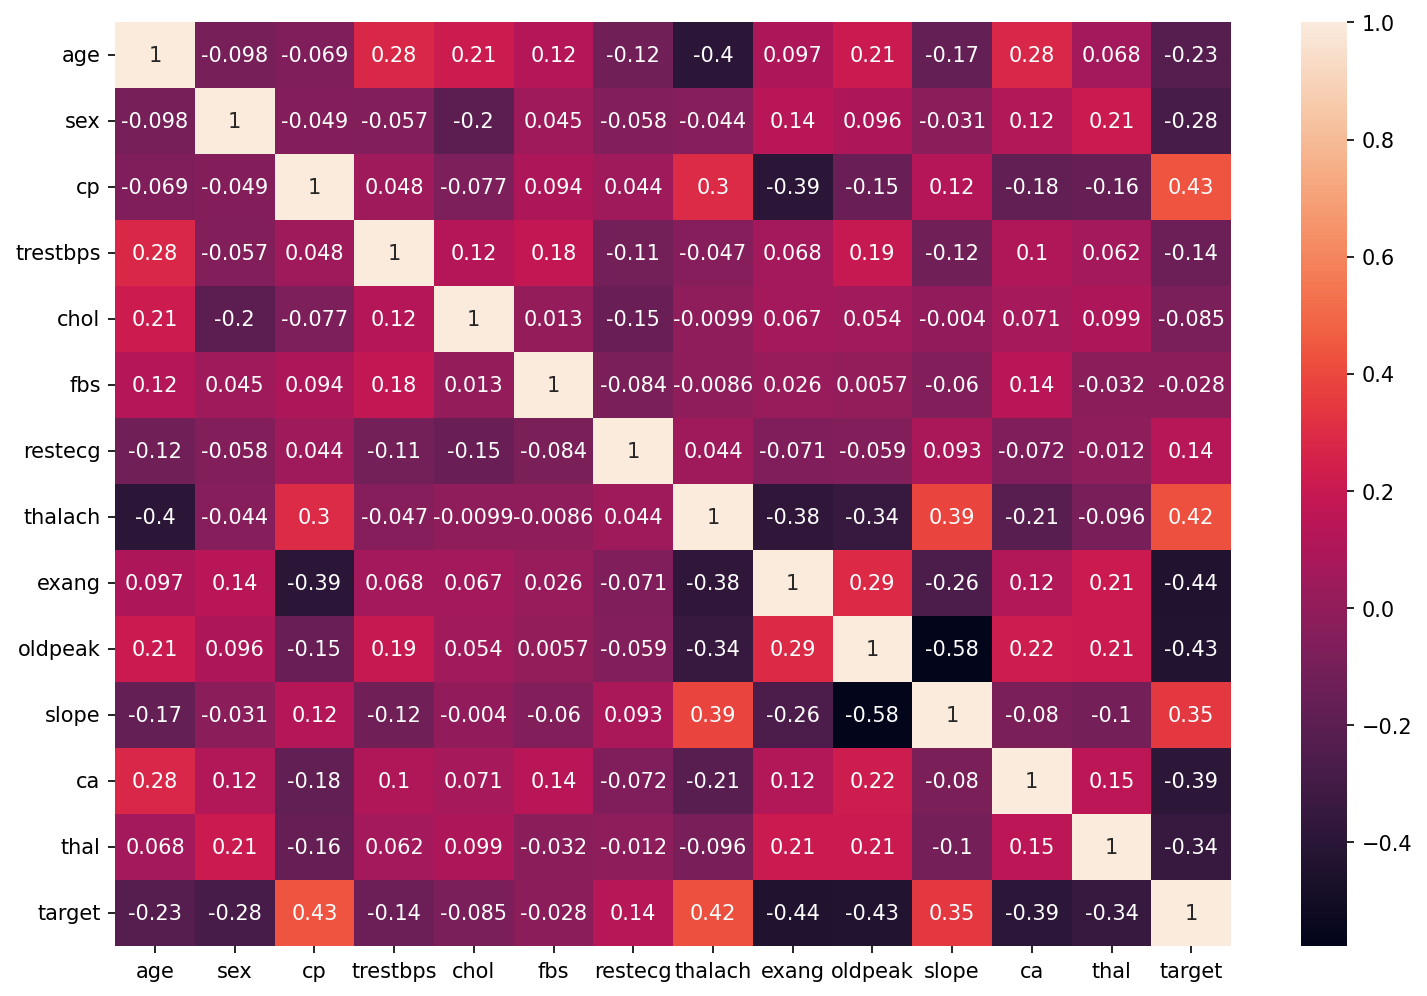

In [19]:
plt.figure(figsize=(12,8) ,dpi=150)
sns.heatmap(data=df.corr(), annot=True );

To see the most relevant features clearly, let's show the heatmap of the correlation between those features

It looks clear that the most relevant features are cp, thalach and slpoe

# **Model Implementation**

In [20]:
X= df.drop(['target'], axis=1)
y=df['target']

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=101)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test )

After preparing the data, let's train the data on a logistic regression model.

In [30]:
log_model = LogisticRegressionCV()
log_model.fit(X_train,y_train)

LogisticRegressionCV()

let's see the best value of c 

In [32]:
log_model.C_

array([0.04641589])

In [33]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [38]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

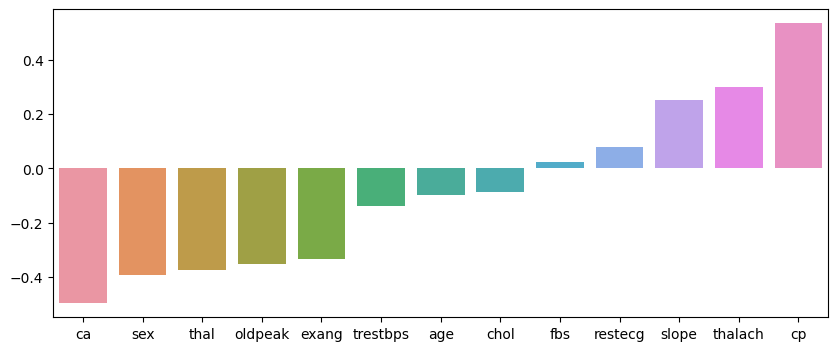

In [42]:
coefs = pd.Series(index=X.columns, data=log_model.coef_[0])
coefs = coefs.sort_values()
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x=coefs.index , y=coefs.values);

This result converge to what the heatmap shows.
It is clear that the most relevant feature of our dataset are cp, thalach and slope.


# **Evaluation of the model performance**

In [50]:
y_prediction = log_model.predict(X_test)

In [51]:
confusion_matrix(y_test,y_prediction)

array([[12,  3],
       [ 2, 14]])

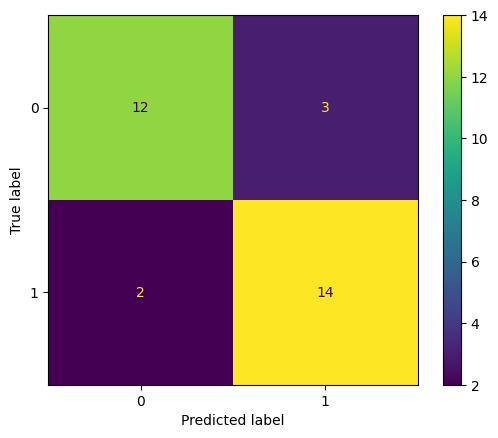

In [53]:
ConfusionMatrixDisplay.from_estimator(log_model,X_test,y_test);

We have just 5 misclassified patients. The model seems to perform well.

Let's confirm that with the accuracy and precision.

In [54]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



Let's see the ROC performance curve for our model

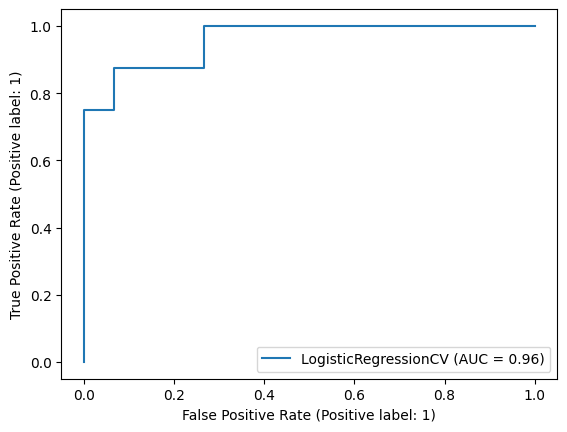

In [56]:
RocCurveDisplay.from_estimator(log_model,X_test,y_test);

# **Prediction on a new patient**

A patient with the following characteristics presented to the doctor's office:

age 48.0

sex 0.0

cp 2.0

trestbps 130.0

cholesterol 275.0

fbs 0.0

restcg 1.0

thalach 139.0

exang 0.0

oldpeak 0.2

slope 2.0

ca 0.0

thal 2.0




In [57]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [58]:
patient = pd.DataFrame(data=patient , columns=X.columns)
scaled_patient=scaler.transform(patient)
log_model.predict(scaled_patient)

array([0])

In [60]:
log_model.predict_proba(scaled_patient)

array([[0.94751173, 0.05248827]])

Our model predict at 94% that the patient does not suffer from a cardiac disease.